In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [166]:
data = pd.read_csv('WDIData.csv')

In [119]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [120]:
data.shape

(422400, 63)

# Create Datasets for Nigeria, SSA and World

In [167]:
# List of SubSaharan African Countries
SSA_Countries = ['AGO','BDI','BEN','BFA','BWA','CAF','CIV',
                  'CMR','COD','COG','COM','CPV','ERI','ETH','GAB','GHA','GIN','GMB','GNB','GNQ','KEN','LBR',
                  'LSO','MDG','MLI','MOZ','MRT','MUS','MWI','NAM','NER','NGA','RWA','SDN','SEN','SLE','SOM',
                  'SSD','STP','SWZ','SYC','TCD','TGO','TZA','UGA']

#Select rows where country names in Nigeria
NG = data[data['Country Name']=='Nigeria']

#Select rows with Sub-Saharan Countries
SSA = data[data['Country Code'].isin(SSA_Countries)]

#World dataset is the entire dataset
World = data


In [168]:
# Check shape of datasets
print('Shape of Nigerian dataset is: ', NG.shape[0], 'rows and ', NG.shape[1], 'Columns')
print('Shape of SSA dataset is: ', SSA.shape[0], 'rows and ', SSA.shape[1], 'Columns')
print('Shape of World dataset is: ', World.shape[0], 'rows and ', World.shape[1], 'Columns')

Shape of Nigerian dataset is:  1600 rows and  63 Columns
Shape of SSA dataset is:  72000 rows and  63 Columns
Shape of World dataset is:  422400 rows and  63 Columns


<b> From the above, we see that the dataset has 1600 indicators in rows.
To get the data in shape for analysis, we have to reshape the data such that the years are in a column called 'Years'. Each indicator would also occupy one column </b>

<b> This is pretty straight forward for the Nigeria dataset since its just for one country ergo each indicator is unique. For the other datasets, one would need to aggregate the indicators such that we only have one instance of each indicator </b>


In [171]:
#setting the indicator code as index
NG.set_index('Indicator Code',inplace=True)
SSA.set_index('Indicator Code',inplace=True)
World.set_index('Indicator Code',inplace=True)

KeyError: 'Indicator Code'

In [170]:
#Dropping unecessary columns
NG.drop(['Country Name', 'Country Code', 'Indicator Name','Unnamed: 62'], axis =1, inplace=True)
SSA.drop(['Country Name', 'Country Code', 'Indicator Name','Unnamed: 62'], axis =1, inplace=True)
World.drop(['Country Name', 'Country Code', 'Indicator Name','Unnamed: 62'], axis =1, inplace=True)

C:\Users\Olabode\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Olabode\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
NG.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Indicator Code,,,,,,,,,,,,,,,,,,,,,
PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.96,2.190000,2.44,2.74,3.090000,3.48,3.920000,4.39,4.91,NaN
EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.30,51.191990,48.00,55.90,54.269905,55.60,56.371914,52.50,59.30,NaN
EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.40,26.902487,34.90,35.50,29.608633,34.40,31.675855,32.80,41.10,NaN


In [173]:
# Aggregate(mean) on inidicator code coulmn
SSA1= SSA.groupby(level=0).mean()
World1= World.groupby(level=0).mean()

# Do a second Aggregation (sum) on indicator column
SSA2= SSA.groupby(level=0).sum()
World2= World.groupby(level=0).sum()

In [174]:
#Transpose dataframe
NG = NG.transpose()
SSA1 = SSA1.transpose()
SSA2 = SSA2.transpose()
World1 = World1.transpose()
World2 = World2.transpose()

In [175]:
NG.head()

Indicator Code,PA.NUS.PPP.05,PA.NUS.PRVT.PP.05,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,FX.OWN.TOTL.MA.ZS,FX.OWN.TOTL.OL.ZS,...,SG.DMK.ALLD.FN.ZS,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
#Reset the index
NG.reset_index(inplace=True)
SSA1.reset_index(inplace=True)
SSA2.reset_index(inplace=True)
World1.reset_index(inplace=True)
World2.reset_index(inplace=True)

In [177]:
NG.head()

Indicator Code,index,PA.NUS.PPP.05,PA.NUS.PRVT.PP.05,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,FX.OWN.TOTL.MA.ZS,...,SG.DMK.ALLD.FN.ZS,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#Rename the Year Column
NG.rename(columns={'index':'Year'}, inplace=True)
SSA1.rename(columns={'index':'Year'}, inplace=True)
SSA2.rename(columns={'index':'Year'}, inplace=True)
World1.rename(columns={'index':'Year'}, inplace=True)
World2.rename(columns={'index':'Year'}, inplace=True)

In [179]:
NG.head()

Indicator Code,Year,PA.NUS.PPP.05,PA.NUS.PRVT.PP.05,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,FX.OWN.TOTL.MA.ZS,...,SG.DMK.ALLD.FN.ZS,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Because there is a lot of missing data, I am going to be considering years 1990 up to 2017

In [180]:
#Make a list of years I am interested in
years = list(range(1990, 2018, 1))

In [181]:
#Convert the items in the list to strings
years= list(map(str, years))

In [182]:
#subset by my list
NG = NG[NG['Year'].isin(years)]
SSA1 = SSA1[SSA1['Year'].isin(years)]
SSA2 = SSA2[SSA2['Year'].isin(years)]
World1 = World1[World1['Year'].isin(years)]
World2 = World2[World2['Year'].isin(years)]

In [183]:
print('Shape of Nigerian dataset is: ', NG.shape[0], 'rows and ', NG.shape[1], 'Columns')
print('Shape of SSA dataset is: ', SSA1.shape[0], 'rows and ', SSA1.shape[1], 'Columns')
print('Shape of World dataset is: ', World1.shape[0], 'rows and ', World1.shape[1], 'Columns')
print('Shape of SSA dataset is: ', SSA2.shape[0], 'rows and ', SSA2.shape[1], 'Columns')
print('Shape of World dataset is: ', World2.shape[0], 'rows and ', World2.shape[1], 'Columns')

Shape of Nigerian dataset is:  28 rows and  1601 Columns
Shape of SSA dataset is:  28 rows and  1601 Columns
Shape of World dataset is:  28 rows and  1601 Columns
Shape of SSA dataset is:  28 rows and  1601 Columns
Shape of World dataset is:  28 rows and  1601 Columns


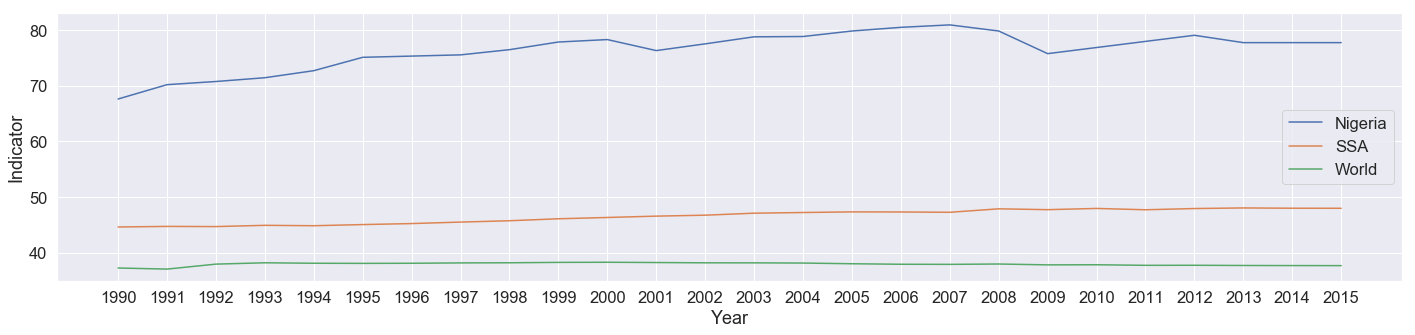

In [184]:
# a quick test plot to be sure everything is good
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =NG , x= NG['Year'], y=NG['AG.LND.AGRI.ZS'])
sns.lineplot(data =SSA1 , x= SSA1['Year'], y=SSA1['AG.LND.AGRI.ZS'])
sns.lineplot(data =World1 , x= World1['Year'], y=World1['AG.LND.AGRI.ZS'])
plt.xlabel('Year')
plt.ylabel('Indicator')
plt.legend(['Nigeria', 'SSA', 'World'])
plt.tight_layout()

# How many Nigerians are there?

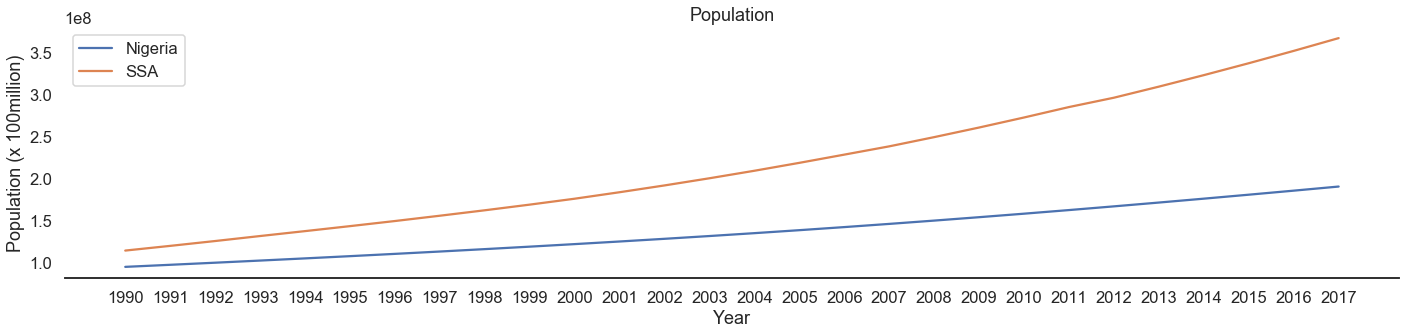

In [197]:
ax = plt.figure(figsize=(20,5))
sns.set_style("white")
sns.set_context('talk')
sns.lineplot(data =NG , x= NG['Year'], y=NG['SP.POP.TOTL'])
sns.lineplot(data =SSA2 , x= SSA2['Year'], y=SSA2['SP.URB.TOTL'])
#sns.lineplot(data =World2 , x= World2['Year'], y=World2['SP.RUR.TOTL'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('Population (x 100million)')
plt.legend(['Nigeria', 'SSA', 'World'])
plt.title('Population')
plt.tight_layout()
sns.despine(left=True)

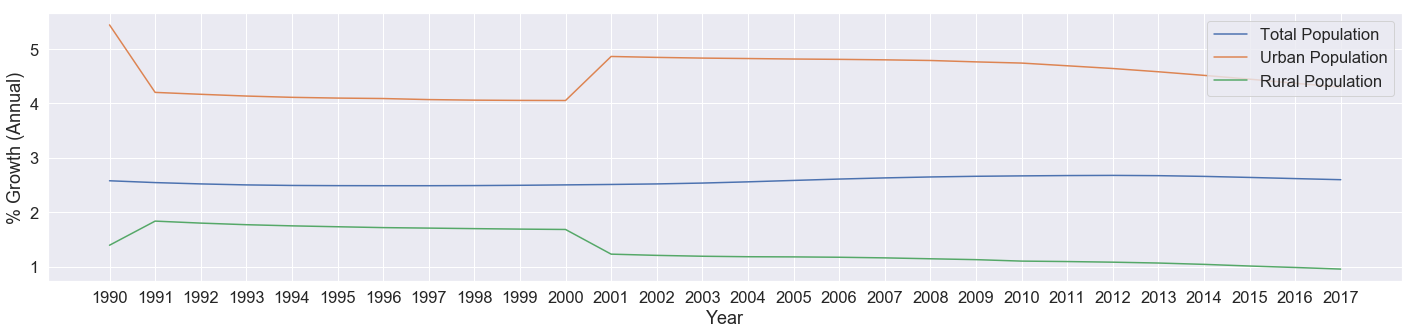

In [97]:
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['SP.POP.GROW'])
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['SP.URB.GROW'])
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['SP.RUR.TOTL.ZG'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('% Growth (Annual)')
plt.legend(['Total Population', 'Urban Population','Rural Population'])
plt.tight_layout()

# How has Nigeria been doing with regards to Agriculture

<h3> We will be looking at the following indicators</h3>
<li> Percenatage of agricultural land</li>

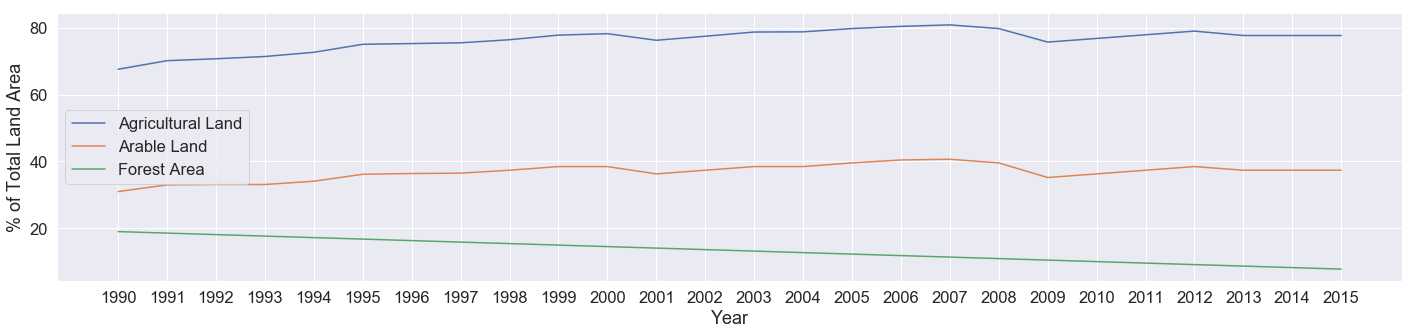

In [88]:
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['AG.LND.AGRI.ZS'])
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['AG.LND.ARBL.ZS'])
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['AG.LND.FRST.ZS'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('% of Total Land Area')
plt.legend(['Agricultural Land', 'Arable Land', 'Forest Area'])
plt.tight_layout()

In [ ]:
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['AG.LND.FRST.ZS'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('% of Population')
plt.legend(['Access to Electricity'])
plt.tight_layout()

# Climate

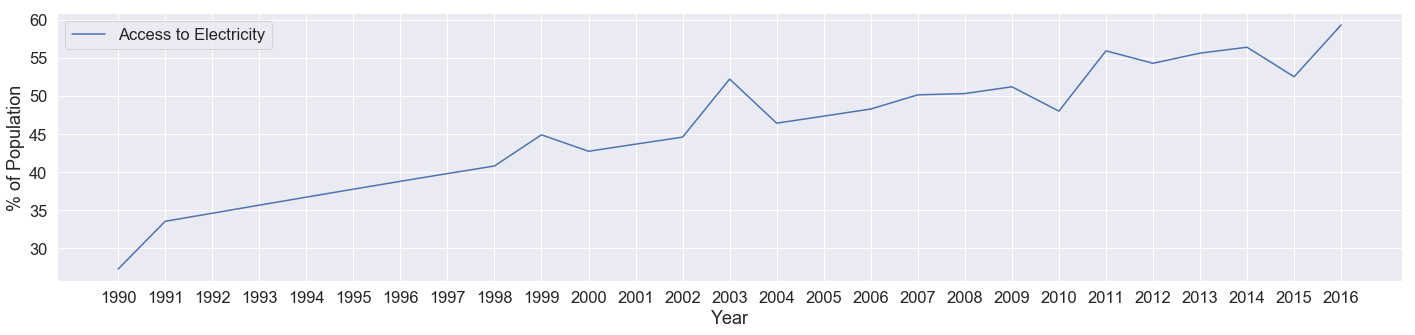

In [87]:
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['EG.ELC.ACCS.ZS'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('% of Population')
plt.legend(['Access to Electricity'])
plt.tight_layout()

# Economy & Growth

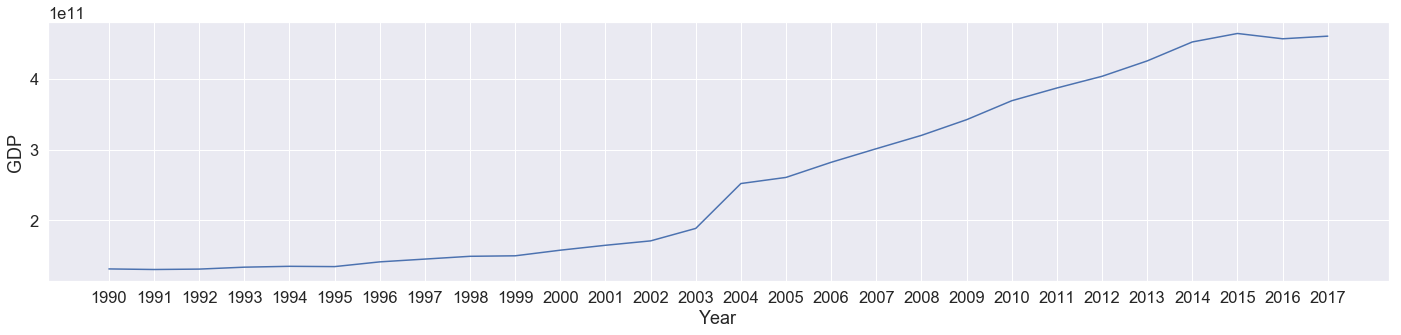

In [104]:
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['NY.GDP.MKTP.KD'])
#sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['GC.XPN.TOTL.GD.ZS'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('GDP')
#plt.legend(['Current Balance','Expense'])
plt.tight_layout()

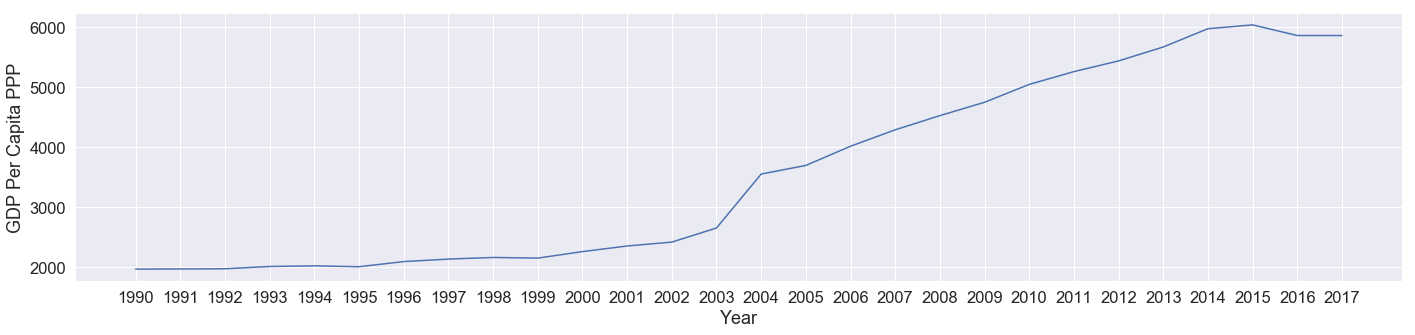

In [106]:
ax = plt.figure(figsize=(20,5))
sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['NY.GDP.PCAP.PP.CD'])
#sns.lineplot(data =df_NG , x= df_NG['Year'], y=df_NG['GC.XPN.TOTL.GD.ZS'])
plt.xlabel('Year', fontsize = 'medium')
plt.ylabel('GDP Per Capita PPP')
#plt.legend(['Current Balance','Expense'])
plt.tight_layout()